# Part I - (LOAN DATA FROM PROSPER)
## by (SANDRA NWANKWO)

## Introduction
> Loan Data from Prosper is a data set that contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 

> Prosper is a personal loan pioneer — the San Francisco, California based company specializes in loans at low interest rates to the borrowers. The company became the first firm to enter the peer-to-peer lending arena when it launched in 2005.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
loan = pd.read_csv("C:\\Users\\User\\Downloads\\prosperLoanData.csv")

In [3]:
#display information on trhis dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
#Returns the first 5 rows of the dataframe
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
#to get the shape of the dataset
loan.shape

(113937, 81)

In [6]:
##find duplicate rows across all columns
duplicateRows = loan[loan.duplicated()]
duplicateRows

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


### What is the structure of your dataset?

> The dataset comprises 113,937 loans (rows) and 81 features (columns)
> Out of the 81 columns, 56 contain numeric data
> This dataset has 0 duplicate rows.

### What is/are the main feature(s) of interest in your dataset?

> I am particularly interested in understanding the different motivations of borrowers when applying for loans. I also want to know the conditions that favor loan eligibilty.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?


> ListingCreationDate. ListingCategory (numeric). BorrowerState.isBorrowerHomeowner. IncomeRange. IncomeVerifiable. DebtToIncomeRatio. StatedMonthlyIncome. ProsperRating (Alpha). Term. EmploymentStatus. LoanStatus. LoanOriginalAmount. BorrowerAPR

* ListingCreationDate: The date the listing was created.
* Term: The length of the loan expressed in months.
* LoanStatus: The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, 
* BorrowerAPR: The Borrower’s Annual Percentage Rate (APR) for the loan.
* BorrowerRate: The Borrower’s interest rate for this loan.
* ProsperRating (numeric): The Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA. Applicable for loans originated after July 2009.
* ProsperRating (Alpha): The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.
* EmploymentStatus: The employment status of the borrower at the time they posted the listing.
* DebtToIncomeRatio: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
* IncomeRange: The income range of the borrower at the time the listing was created.
* StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created.
* LoanOriginalAmount: The origination amount of the loan.
* LoanOriginationDate: The date the loan was originated.
* ListingCategory: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

### Data Assessment

In [7]:
# Create a list of features needed for this dataset exploration
features = ['ListingCreationDate', 'ListingCategory (numeric)', 'BorrowerState', 'IsBorrowerHomeowner',
                'IncomeRange', 'ProsperRating (numeric)', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)',
                'EmploymentStatus', 'LoanStatus', 'LoanOriginalAmount', 'BorrowerAPR']

In [8]:
#Let proceed to programmatically access this list
loan[features].head()

,ListingCreationDate,ListingCategory (numeric),BorrowerState,IsBorrowerHomeowner,IncomeRange,ProsperRating (numeric),DebtToIncomeRatio,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,LoanStatus,LoanOriginalAmount,BorrowerAPR
0,2007-08-26 19:09:29.263000000,0,CO,True,"$25,000-49,999",NaN,0.17,3083.333333,36,NaN,Self-employed,Completed,9425,0.16516
1,2014-02-27 08:28:07.900000000,2,CO,False,"$50,000-74,999",6.0,0.18,6125.000000,36,A,Employed,Current,10000,0.12016
2,2007-01-05 15:00:47.090000000,0,GA,False,Not displayed,NaN,0.06,2083.333333,36,NaN,Not available,Completed,3001,0.28269
3,2012-10-22 11:02:35.010000000,16,GA,True,"$25,000-49,999",6.0,0.15,2875.000000,36,A,Employed,Current,10000,0.12528
4,2013-09-14 18:38:39.097000000,2,MN,True,"$100,000+",3.0,0.26,9583.333333,36,D,Employed,Current,15000,0.24614


In [9]:
#Check for duplicates in the list
duplicates = loan[features].duplicated().sum()
duplicates

871

In [10]:
loan[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   ListingCategory (numeric)  113937 non-null  int64  
 2   BorrowerState              108422 non-null  object 
 3   IsBorrowerHomeowner        113937 non-null  bool   
 4   IncomeRange                113937 non-null  object 
 5   ProsperRating (numeric)    84853 non-null   float64
 6   DebtToIncomeRatio          105383 non-null  float64
 7   StatedMonthlyIncome        113937 non-null  float64
 8   Term                       113937 non-null  int64  
 9   ProsperRating (Alpha)      84853 non-null   object 
 10  EmploymentStatus           111682 non-null  object 
 11  LoanStatus                 113937 non-null  object 
 12  LoanOriginalAmount         113937 non-null  int64  
 13  BorrowerAPR                11

### Assessment Results

>* There are 871 duplicate records in the dataset
>* **ProsperRating (Alpha)** and **ProsperRating (numeric)** should be combined into a new column called **ProsperRating**
>* Change the coumn name of **ListingCategory (numeric)** into something concise - **ListingCategory**
>* **ListingCreationDate** has th wrong datatype
>* Replace Not employed_ entries in **IncomeRange** with 0
>* Missing Values in **DebtToIncomeRatio** and **BorrowerAPR**
>* Map the **ListingCategory** column to the fitting titles

### Data Cleaning

In [11]:
#Make a copy of the original dataset
loan_to_clean = loan.copy()

* There are 871 duplicate records in the dataset

In [12]:
#drop duplicate 
loan_to_clean = loan_to_clean.drop_duplicates()
#test
duplicates = loan_to_clean.duplicated().sum()
duplicates

0

* ProsperRating (Alpha) and ProsperRating (numeric) should be combined into a new column called ProsperRating

In [13]:
# merge into column
loan_to_clean["ProsperRating"] = loan_to_clean["ProsperRating (numeric)"].astype(str) + loan_to_clean["ProsperRating (Alpha)"]

In [14]:
# Dropping the stage columns
loan_to_clean.drop(columns=['ProsperRating (Alpha)', 'ProsperRating (numeric)'], inplace=True)

In [15]:
#test
loan_to_clean.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperScore', 'ListingCategory (numeric)',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'GroupKey', 'DateCreditPulled', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'FirstRecordedCreditLine',
       'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies',
       'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNev

* Change the column name of ListingCategory (numeric) into something concise - ListingCategory

In [16]:
# Rename column
loan_to_clean = loan_to_clean.rename(columns = {'ListingCategory (numeric)': 'ListingCategory'})

#test
loan_to_clean.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperScore', 'ListingCategory', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (per

* ListingCreationDate has the wrong datatype

In [17]:
#convert to 'datetime' datatype
loan_to_clean['ListingCreationDate'] = pd.to_datetime(loan_to_clean['ListingCreationDate'])

#test
loan_to_clean['ListingCreationDate'].dtypes

dtype('<M8[ns]')

* Replace Not employed_ entries in IncomeRange with 0

In [18]:
#replace with 0
loan_to_clean.IncomeRange = loan_to_clean.IncomeRange.str.replace('Not employed', '$0')

#test
loan_to_clean.IncomeRange

0         $25,000-49,999
1         $50,000-74,999
2          Not displayed
3         $25,000-49,999
4              $100,000+
               ...      
113932    $50,000-74,999
113933    $75,000-99,999
113934    $25,000-49,999
113935    $25,000-49,999
113936    $50,000-74,999
Name: IncomeRange, Length: 113937, dtype: object

In [19]:
#test
assert 'Not employed' not in loan_to_clean.IncomeRange

* Missing Values in DebtToIncomeRatio and BorrowerAPR

In [20]:
# Create a list of columns with null values
null_columns = ['BorrowerAPR', 'ProsperRating']

# Estimate the number of null records in each column with a list comprehension
null_counts = [loan_to_clean[col].isnull().sum() for col in null_columns]

# Calculate the total proportion of null values in the dataframe
null_proportion = sum(null_counts) / loan.shape[0]

print('The combined percentage of null records is ' + str(null_proportion * 100)[:4] + '%')

The combined percentage of null records is 25.5%


In [21]:
# Filter out null values from the data
for col in null_columns:
    loan_to_clean = loan_to_clean[loan_to_clean[col].notnull()]

# Verify
for col in null_columns:
    assert loan_to_clean[col].notnull().any()

In [22]:
#test
sum(loan_to_clean.BorrowerAPR.isnull())

0

In [23]:
#test
sum(loan_to_clean.ProsperRating.isnull())

0

* Map the ListingCategory column to the fitting titles

In [24]:
# Create a dictionary for the numbers and their titles
titles = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
          4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby & Adoption', 
          9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
         13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical or Dental', 16 : 'Motorcycle',
         17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

# Mapping each number with what it represents
loan_to_clean.ListingCategory = loan_to_clean.ListingCategory.map(titles)

In [25]:
loan_to_clean.ListingCategory.unique()

array(['Home Improvement', 'Motorcycle', 'Debt Consolidation', 'Other',
       'Household Expenses', 'Auto', 'Medical or Dental', 'Wedding Loans',
       'Vacation', 'Taxes', 'Business', 'Baby & Adoption',
       'Engagement Ring', 'Large Purchases', 'Boat', 'RV',
       'Cosmetic Procedure', 'Not Available', 'Student Use',
       'Green Loans'], dtype=object)

### Storing Data

In [26]:
loan_to_clean.to_csv('new_prosperLoanData.csv', index = False)

In [27]:
loan_clean = pd.read_csv('new_prosperLoanData.csv')

## Univariate Exploration
### Q1: What is the distribution of Borrowers APR?
#### Visualization 1

In [28]:
# Defining a function to create an specify plot size

def plot(x,y):
    plt.figure(figsize = [x,y])

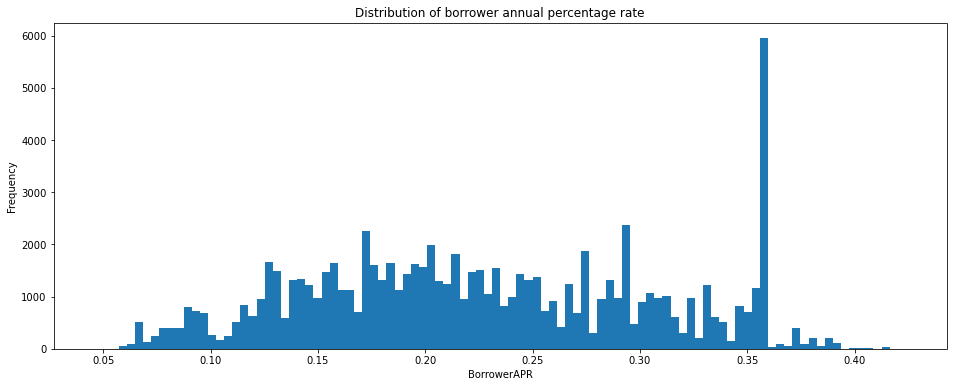

In [29]:
plot(16,6)
plt.hist(data = loan_clean, x = 'BorrowerAPR', bins=100);
plt.title('Distribution of borrower annual percentage rate')
plt.xlabel('BorrowerAPR');
plt.ylabel('Frequency');

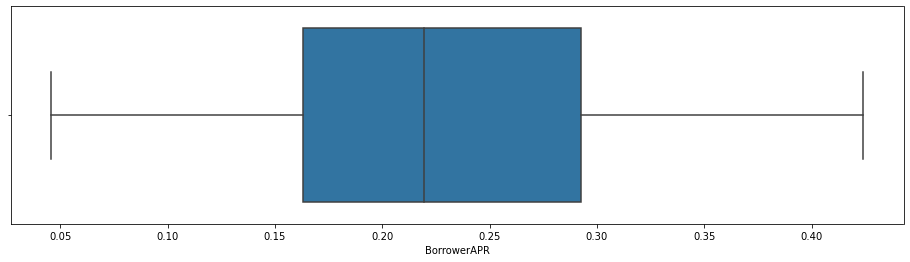

In [30]:
#Create a box plot for further visualization
plot(16, 4)
sb.boxplot(data = loan_clean, x='BorrowerAPR');

#### Observations 1
> * Borrower APR appears to have multimodal distribution, with peaks around 0.09, 0.2 and 0.3 respectively. The highest peak is seen between 0.35 and 0.36.
> * From the box plot, you can see the presence of few outliers

### Q2: How is the loan distributed among borrowers?
#### Visualization 2

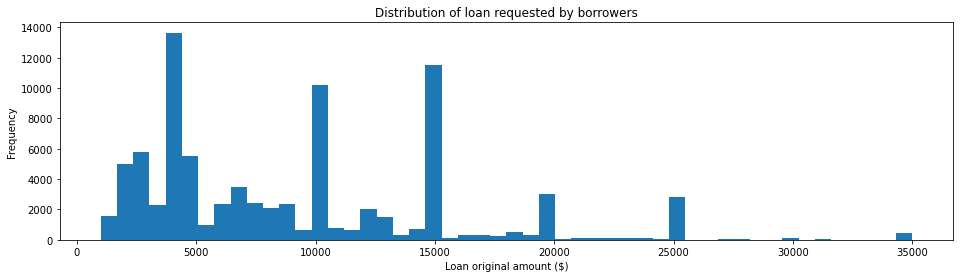

In [31]:
plot(16, 4)
plt.hist(data = loan_clean, x = 'LoanOriginalAmount', bins=50);
plt.title('Distribution of loan requested by borrowers')
plt.xlabel('Loan original amount ($)');
plt.ylabel('Frequency');

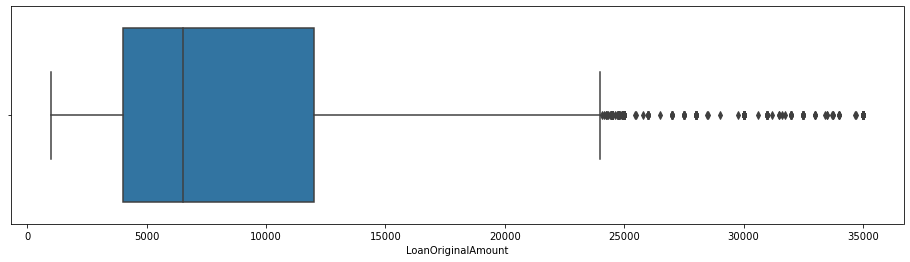

In [32]:
plot(16, 4)
sb.boxplot(data = loan, x='LoanOriginalAmount');

#### Observation 2
> * Presence of outliers
> * There are significant spikes in the loan amounts around multiples of 5,000, 10000, 15000. The sharpest spike is seen around 5000. This can imply that most borrowers requested loans in mutiples of 5,000 for ease of refund  or for the convenience of using a round figure.

### Q3: Which state has the highest number of borrowers?

In [33]:
loan_clean.dropna(subset=['BorrowerState'], inplace = True)

In [34]:
loan_clean.BorrowerState.unique()

array(['CO', 'GA', 'MN', 'NM', 'KS', 'CA', 'IL', 'MD', 'AL', 'AZ', 'VA',
       'FL', 'PA', 'OR', 'NY', 'LA', 'WI', 'OH', 'NC', 'WA', 'MI', 'NV',
       'NJ', 'TX', 'AR', 'SC', 'DE', 'UT', 'DC', 'MA', 'MO', 'CT', 'IN',
       'KY', 'OK', 'MS', 'WV', 'RI', 'TN', 'ID', 'HI', 'NH', 'NE', 'WY',
       'AK', 'MT', 'VT', 'SD'], dtype=object)

In [35]:
len(loan_clean.BorrowerState.unique())

48

In [36]:
loan_clean['full_statename'] = loan_clean['BorrowerState']
ab = loan_clean['full_statename']


loan_clean.loc[loan_clean["full_statename"] == "CO", "full_statename"] = 'Colorado'
loan_clean.loc[loan_clean["full_statename"] == "GA", "full_statename"] = 'Georgia'
loan_clean.loc[loan_clean["full_statename"] == "MN", "full_statename"] = 'Minnesota'
loan_clean.loc[loan_clean["full_statename"] == "NM", "full_statename"] = 'New Mexico'
loan_clean.loc[loan_clean["full_statename"] == "KS", "full_statename"] = 'Kansas'
loan_clean.loc[loan_clean["full_statename"] =="CA", "full_statename"] = 'California'
loan_clean.loc[loan_clean["full_statename"] == "IL", "full_statename"] = 'Illinois'
loan_clean.loc[loan_clean["full_statename"] == "MD", "full_statename"] = 'Maryland'
loan_clean.loc[loan_clean["full_statename"] == "AL", "full_statename"] = 'Alabama'
loan_clean.loc[loan_clean["full_statename"] == "AZ", "full_statename"] = 'Arizona'
loan_clean.loc[loan_clean["full_statename"] == "VA", "full_statename"] = 'Virginia'
loan_clean.loc[loan_clean["full_statename"] == "FL", "full_statename"] = 'Florida'
loan_clean.loc[loan_clean["full_statename"] == "PA", "full_statename"] = 'Pennsylvania'
loan_clean.loc[loan_clean["full_statename"] == "OR", "full_statename"] = 'Oregon'
loan_clean.loc[loan_clean["full_statename"] == "MI", "full_statename"] = 'Michigan'
loan_clean.loc[loan_clean["full_statename"] == "NY", "full_statename"] = 'New York'
loan_clean.loc[loan_clean["full_statename"] == "LA", "full_statename"] = 'Louisiana'
loan_clean.loc[loan_clean["full_statename"] == "WI", "full_statename"] = 'Wisconsin'
loan_clean.loc[loan_clean["full_statename"] == "OH", "full_statename"] = 'Ohio'
loan_clean.loc[loan_clean["full_statename"] == "NC", "full_statename"] = 'North Carolina'
loan_clean.loc[loan_clean["full_statename"] == "WA", "full_statename"] = 'Washington'
loan_clean.loc[loan_clean["full_statename"] == "NV", "full_statename"] = 'Neveda'
loan_clean.loc[loan_clean["full_statename"] == "NJ", "full_statename"] = 'New Jersey'
loan_clean.loc[loan_clean["full_statename"] == "TX", "full_statename"] = 'Texas'
loan_clean.loc[loan_clean["full_statename"] == "AR", "full_statename"] = 'Arkansas'
loan_clean.loc[loan_clean["full_statename"] == "SC", "full_statename"] = 'South Carolina'
loan_clean.loc[loan_clean["full_statename"] == "DE", "full_statename"] = 'Deleware'
loan_clean.loc[loan_clean["full_statename"] == "UT", "full_statename"] = 'Utah'
loan_clean.loc[loan_clean["full_statename"] == "DC", "full_statename"] = 'District of Columbia'
loan_clean.loc[loan_clean["full_statename"] == "MA", "full_statename"] = 'Massachusetts'
loan_clean.loc[loan_clean["full_statename"] == "MO", "full_statename"] = 'Missouri'
loan_clean.loc[loan_clean["full_statename"] == "CT", "full_statename"] = 'Connecticut'
loan_clean.loc[loan_clean["full_statename"] == "IN", "full_statename"] = 'Indiana'
loan_clean.loc[loan_clean["full_statename"] == "KY", "full_statename"] = 'Kentucky'
loan_clean.loc[loan_clean["full_statename"] == "OK", "full_statename"] = 'Oklahoma'
loan_clean.loc[loan_clean["full_statename"] == "MS", "full_statename"] = 'Mississippi'
loan_clean.loc[loan_clean["full_statename"] == "WV", "full_statename"] = 'West Virginia'
loan_clean.loc[loan_clean["full_statename"] == "RI", "full_statename"] = 'Rhode Island'
loan_clean.loc[loan_clean["full_statename"] == "TN", "full_statename"] = 'Tennessee'
loan_clean.loc[loan_clean["full_statename"] == "ID", "full_statename"] = 'Idaho'
loan_clean.loc[loan_clean["full_statename"] == "HI", "full_statename"] = 'Hawaii'
loan_clean.loc[loan_clean["full_statename"] == "NH", "full_statename"] = 'New Hampshire'
loan_clean.loc[loan_clean["full_statename"] == "NE", "full_statename"] = 'Nebraska'
loan_clean.loc[loan_clean["full_statename"] == "WY", "full_statename"] = 'Wyoming'
loan_clean.loc[loan_clean["full_statename"] == "ME", "full_statename"] = 'Maine'
loan_clean.loc[loan_clean["full_statename"] == "AK", "full_statename"] = 'Alaska'
loan_clean.loc[loan_clean["full_statename"] == "IA", "full_statename"] = 'Iowa'
loan_clean.loc[loan_clean["full_statename"] == "MT", "full_statename"] = 'Montana'
loan_clean.loc[loan_clean["full_statename"] == "VT", "full_statename"] = 'Vermont'
loan_clean.loc[loan_clean["full_statename"] == "SD", "full_statename"] = 'South Dakota'
loan_clean.loc[loan_clean["full_statename"] == "ND", "full_statename"] = 'North Dakota'

In [37]:
loan_clean['full_statename'].unique()

array(['Colorado', 'Georgia', 'Minnesota', 'New Mexico', 'Kansas',
       'California', 'Illinois', 'Maryland', 'Alabama', 'Arizona',
       'Virginia', 'Florida', 'Pennsylvania', 'Oregon', 'New York',
       'Louisiana', 'Wisconsin', 'Ohio', 'North Carolina', 'Washington',
       'Michigan', 'Neveda', 'New Jersey', 'Texas', 'Arkansas',
       'South Carolina', 'Deleware', 'Utah', 'District of Columbia',
       'Massachusetts', 'Missouri', 'Connecticut', 'Indiana', 'Kentucky',
       'Oklahoma', 'Mississippi', 'West Virginia', 'Rhode Island',
       'Tennessee', 'Idaho', 'Hawaii', 'New Hampshire', 'Nebraska',
       'Wyoming', 'Alaska', 'Montana', 'Vermont', 'South Dakota'],
      dtype=object)

#### Visualization 3

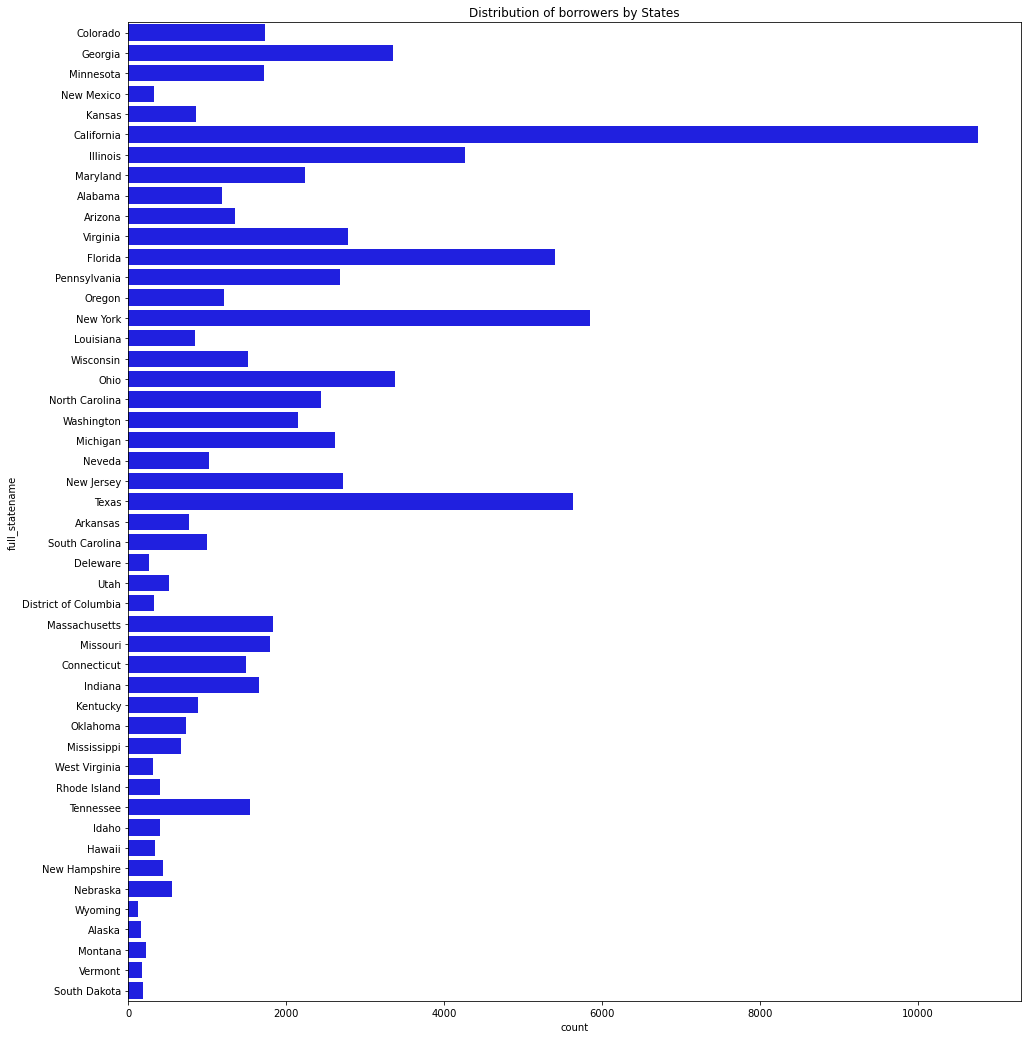

In [38]:
plot(16, 18)
sns.countplot(data=loan_clean, y='full_statename', color = 'blue').set_title('Distribution of borrowers by States');

#### Observation 3
> * California has the largest number of borrowers while Wyoming has the list number of borrowers.
### Q4: How are monthly incomes distributed among the borrowers?

#### Visualization 4

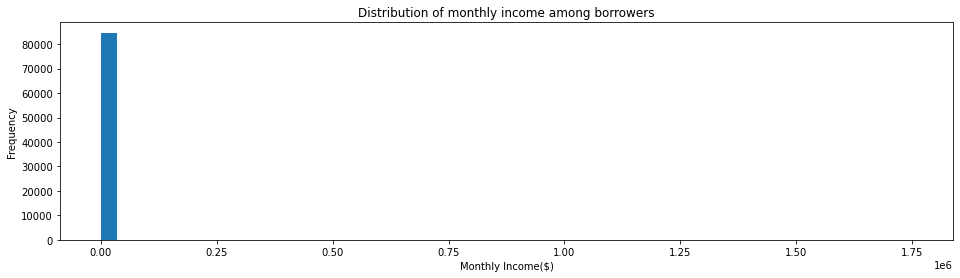

In [39]:
plot(16, 4)
plt.hist(data = loan_clean, x = 'StatedMonthlyIncome', bins=50);
plt.title('Distribution of monthly income among borrowers')
plt.xlabel('Monthly Income($)');
plt.ylabel('Frequency');

#### Observation 4
> * The plot shows that the income of most of the borrowers are below 250,000 (0.25 x 1e6) dollars.
### Q5: How is the loan status distributed among the borrowers?
#### Visualization 5

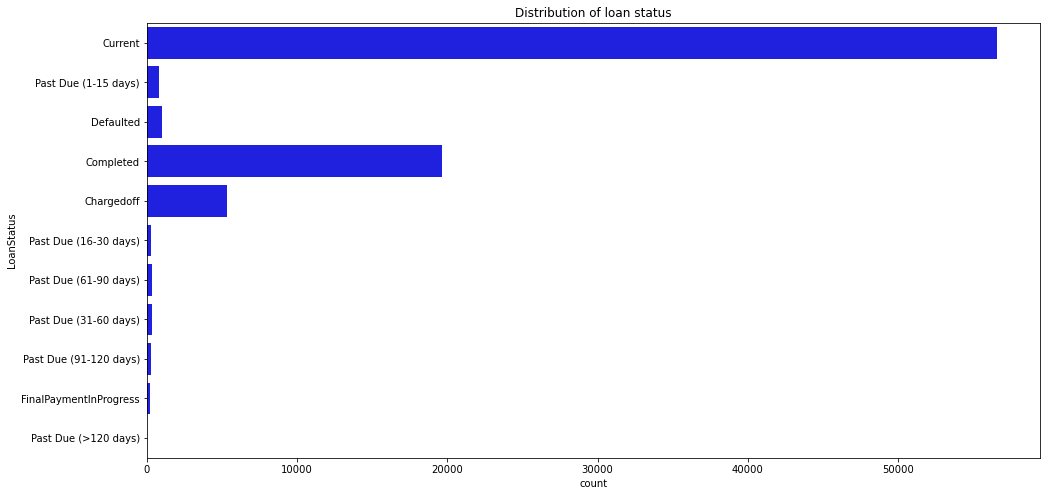

In [40]:
plot(16, 8)
sns.countplot(data=loan_clean, y='LoanStatus', color= 'blue').set_title('Distribution of loan status');

#### Observation 5
> * The dataset has more current loans (loans yet to be paid off) than completed loans. However, complted loans comprise a significant portion of this dataset. Defaulted loans are few and cancelled loans are nonexistent.
### Q6: What are the distribution of IsBorrowerHomeowner and IncomeVerifiable?
#### Visualization 6

Text(0.5, 1.0, 'Verification Status of Income')

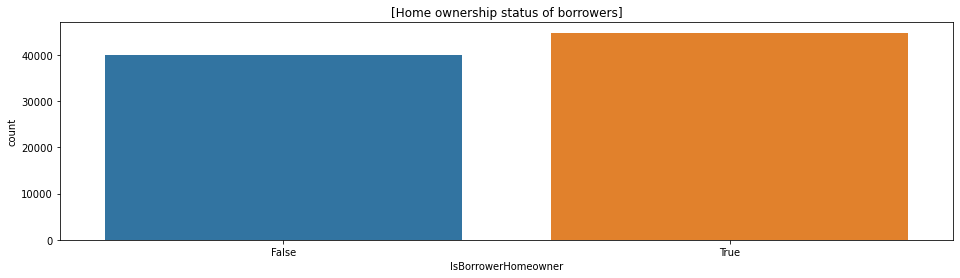

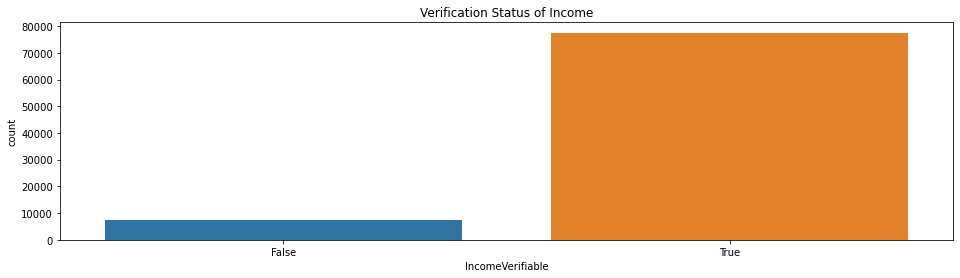

In [41]:
#IsBorrowerHomeowner
plot(16, 4)
sns.countplot(data=loan_clean, x='IsBorrowerHomeowner').set_title('[Home ownership status of borrowers]');

# IncomeVerifiable
plot(16, 4)
sns.countplot(data=loan_clean, x='IncomeVerifiable').set_title('Verification Status of Income')

#### Observations 6
> * A slight majority of the borrowers are homeowners. This makes me assume that home ownership status is not exactly a significant factor the company considers before granting loan requests.
> * A signigicant ajority of the borrowers have a verifiable means of income. This is not surprising as granting loans to borrowers without verified means of income will most likely yield unfavorable results to the loan company.
### Q7: Are borrowers in more debt than their income can handle?
#### Visualization 7

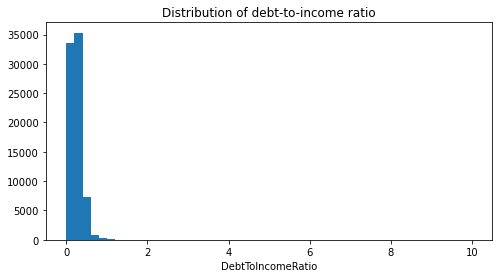

In [42]:
plot(8, 4)
plt.hist(data = loan_clean, x = 'DebtToIncomeRatio', bins=50);
plt.title('Distribution of debt-to-income ratio')
plt.xlabel('DebtToIncomeRatio');

#### Observation 7
> * From the plot, It is safe to assume that majority of the borrowers take loans within their means.
### Q8: What are the loan terms most requested by borrowers?

In [43]:
loan_clean.Term.unique()

array([36, 60, 12], dtype=int64)

#### Visualization 8

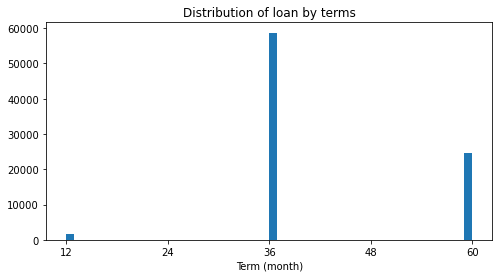

In [44]:
plot(8, 4)
plt.hist(data = loan_clean, x = 'Term', bins=50);
plt.title('Distribution of loan by terms')
plt.xticks(np.arange(12, 61, 12))
plt.xlabel('Term (month)');

#### Observation 8
> * There are three unique terms in this data set: 12 months, 36 months, and 60 months. This most likely suggest that the company has only three terms for loan repayment. From the plot, we can see that the loan term most requested by majority of the borrowers is 36 months.
### Q9: What is the employment status and income range distribution? Does this play any factor in how much loan borrowers request?
#### Visualization 9

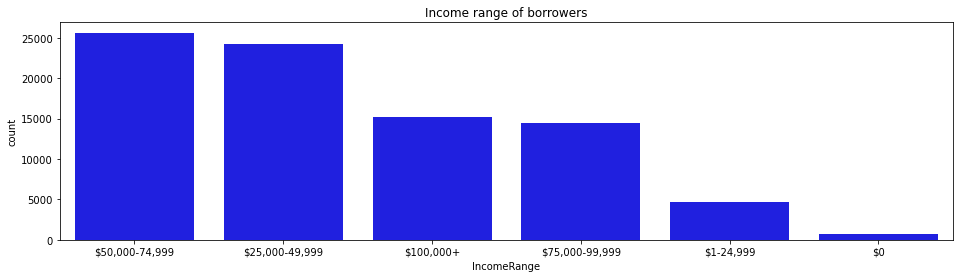

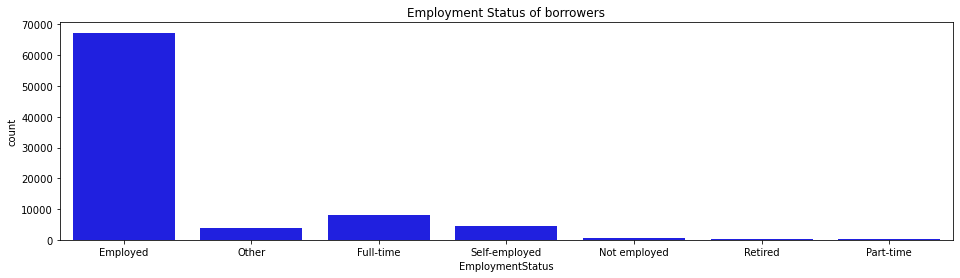

In [45]:
#IncomeRange
plot(16, 4)
sns.countplot(data=loan_clean, x='IncomeRange', color= 'blue').set_title('Income range of borrowers');

#EmploymentStatus
plot(16, 4)
sns.countplot(data=loan_clean, x='EmploymentStatus', color= 'blue').set_title('Employment Status of borrowers');

#### Observation 9
> * A significant amount of borrowers in this dataset fall within the income range of 25000 to 74999 dollars per annum. The least category of borrowers, according to this plot, are either unemployed or have no stated annual income.
> * In the second plot, we can see that majority of the borrowers are employed. The minority are either unemployed, retired, or part-time workers.
> * From these two plots, it is safe to assume that the employment status and income earning strength of borrowers is a signioficant factor the company considers before granting loan requests."
### Q10: What is the ProsperRating distribution?
Prosper Rating means the proprietary credit rating assigned by the Company to each Loan Listing. The Prosper Rating is expressed as a letter grade that indicates the expected level of risk associated with a loan listing.  Each letter grade corresponds to an estimated average annualized loss rate range. Prosper has seven loan grades called Prosper Ratings: AA, A, B, C, D, E and HR where AA is the lowest risk down to HR which actually stands for high risk
#### Visualization 10

In [46]:
# Check for null values
loan_clean['ProsperRating'].isnull().sum()

0

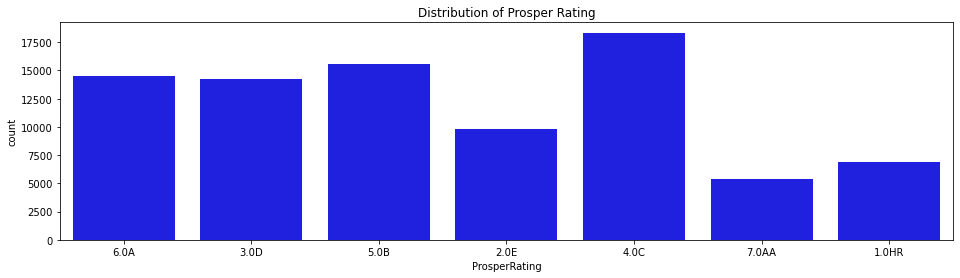

In [47]:
plot(16, 4)
sns.countplot(data=loan_clean, x='ProsperRating', color = 'blue').set_title('Distribution of Prosper Rating');

#### Observation 10
> * From the plot, the most common prosper rating is C, while the least is AA.
### Q11: What is the distribution of the ListingCategory?
#### Visualization 11

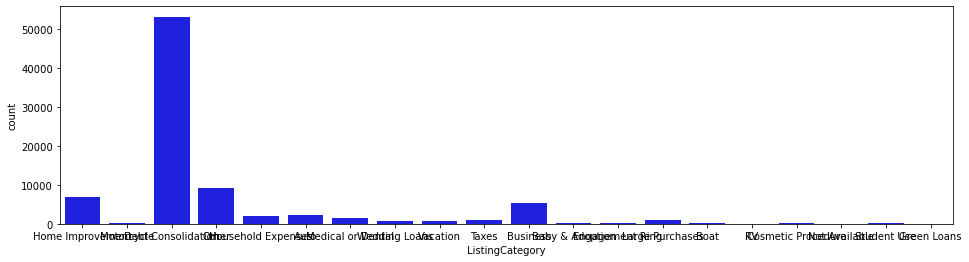

In [48]:
plot(16, 4)
sb.countplot(data = loan_clean, x = 'ListingCategory', color='blue');

* The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

#### Observations 11
>* The highest listing category is Debt Consolidation (which is rather interesting)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I noticed most of the distributions were right skewed (Debt-to-Income, StatedMonthlyIncome), and a few follow multimodal distribution (Borrower APR)

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I had to perform some wrangling operations on some of the columns in order to get accurate visualization result.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [49]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ListingKey                           84853 non-null  object 
 1   ListingNumber                        84853 non-null  int64  
 2   ListingCreationDate                  84853 non-null  object 
 3   CreditGrade                          0 non-null      float64
 4   Term                                 84853 non-null  int64  
 5   LoanStatus                           84853 non-null  object 
 6   ClosedDate                           26005 non-null  object 
 7   BorrowerAPR                          84853 non-null  float64
 8   BorrowerRate                         84853 non-null  float64
 9   LenderYield                          84853 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null  float64
 11  EstimatedLoss               

##### From the dataset information, we can see the features (of interest) that fall under the numerical variables and the ones that are categorical variables

In [50]:
numerical_variables = ['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperScore', 
                     'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'LP_ServiceFees', 'Investors',
                    'ProsperRating','LoanCurrentDaysDelinquent']
categorical_variables = ['LoanStatus', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 
                         'EmploymentStatus', 'IncomeRange']

### Q1: Is there a relationship between BorrowerAPR and LoanOriginalAmount?
#### Visualization 1

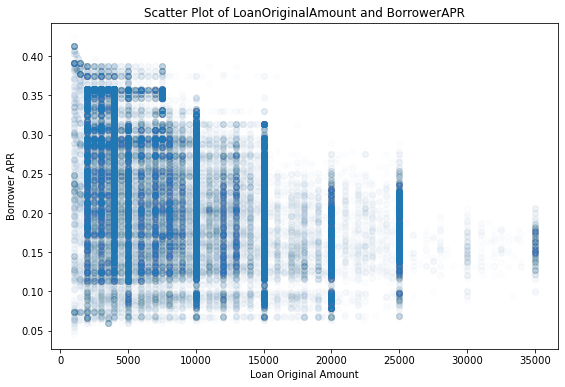

In [51]:
plot(20,6) 
plt.subplot(1, 2, 1)
plt.scatter(data = loan_clean, x = 'LoanOriginalAmount', y = 'BorrowerAPR',  alpha =  0.01)
plt.title('Scatter Plot of LoanOriginalAmount and BorrowerAPR')
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower APR');

#### Observation 1
> * There appears to be a negative relationship between BorrowerAPR and Loan Original Amount. This suggest that as the loan amount increases, the Borrower’s Annual Percentage Rate for the loan decreases.
### Q2: Is there a relationship between the DebtToIncomeRatio and the StatedMonthlyIncome?
#### Visualization 2

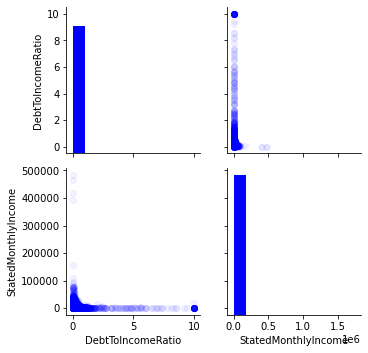

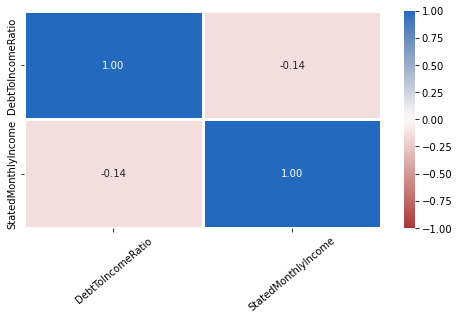

In [52]:
# Store column names in a list
cols = ['DebtToIncomeRatio', 'StatedMonthlyIncome']

# Create a scatterplot comparing the variables
X = sns.PairGrid(loan_clean[cols])
X.map_diag(plt.hist, color = 'blue')
X.map_offdiag(plt.scatter,color = 'blue', alpha=0.05);

# create a heatmap for further visualization
plot(8,4)
sns.heatmap(data=loan_clean[cols].corr(), annot=True, fmt='.2f', 
            cmap='vlag_r', vmin=-1, vmax=1, linewidth=3)
plt.xticks(rotation=40);

#### Observation 2
>* I cannot see any notable relationship between DebtToIncomeRatio and the StatedMonthlyIncome
### Q3: Is there any relationship between LoanStatus and Borrowers APR?
#### Visualization 3

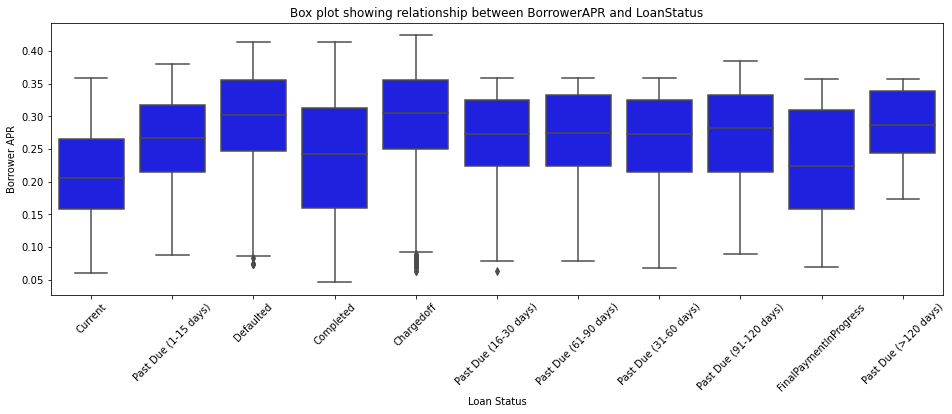

In [53]:
plot(16, 5)
sb.boxplot(data=loan_clean,y='BorrowerAPR',x='LoanStatus', color= 'blue')
plt.title('Box plot showing relationship between BorrowerAPR and LoanStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Loan Status');
plt.xticks(rotation=45);

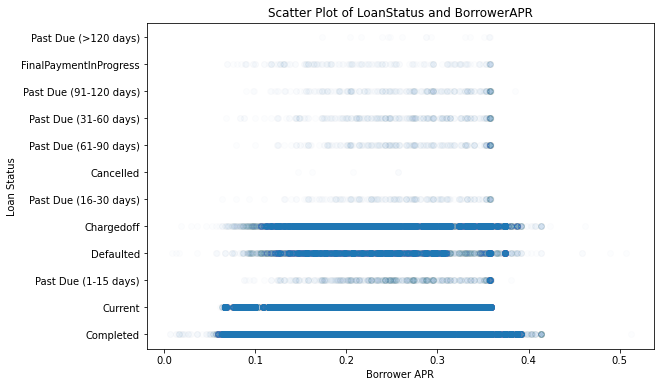

In [54]:
plot(20, 6) 
plt.subplot(1, 2, 1)
plt.scatter(data = loan, x = 'BorrowerAPR', y = 'LoanStatus',  alpha =  0.01)
plt.title('Scatter Plot of LoanStatus and BorrowerAPR')
plt.xlabel('Borrower APR')
plt.ylabel('Loan Status');

#### Observation 3
>* This box plot comparison between BorrowerAPR vs LoanStatus draws attention to certain potential outliers
>* Current and completed loans have lower rate than the past-due loans
>* There is no linear correlation between BorrowersAPR and LoanStatus (correlation = 0)
### Q4: Is there a relationship between the BorrowerAPR and BorrowerRate?
#### Viisualization 4

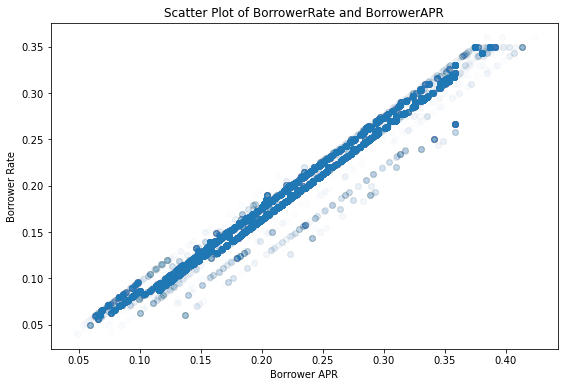

In [55]:
plot(20, 6) 
plt.subplot(1, 2, 1)
plt.scatter(data = loan_clean, x = 'BorrowerAPR', y = 'BorrowerRate',  alpha =  0.01)
plt.title('Scatter Plot of BorrowerRate and BorrowerAPR')
plt.xlabel('Borrower APR')
plt.ylabel('Borrower Rate');

#### Observation 4
> * There is a large positive correlation between BorrowerRate and BorrowerAPR. This means that as the Borrower’s interest rate increases, the Borrower’s Annual Percentage Rate also increases (and vice-versa)
### Q5: Is there any relationship between EmploymentStatus and Borrower APR?
An APR is a number that represents the total yearly cost of borrowing money, expressed as a percentage of the principal loan amount. The APR on a loan or credit card aims to offer a complete picture of how much it costs to borrow money. In this visualization, I am curious to know if there is a linear relationship between the employment status of borrowers and the APR on their loans.
#### Visualization 5

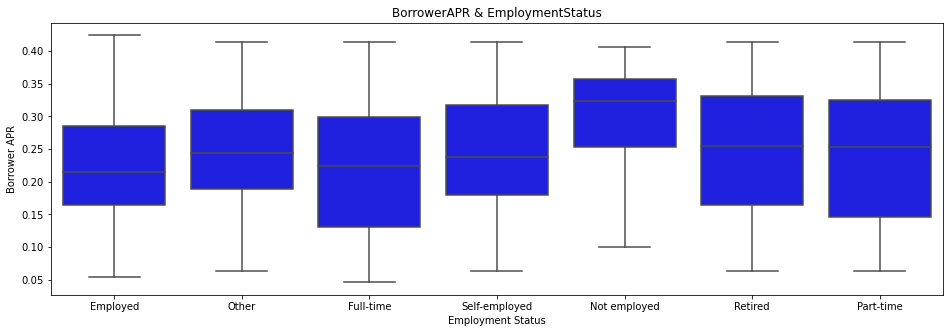

In [56]:
plot(16, 5)
sb.boxplot(data=loan_clean,y='BorrowerAPR',x='EmploymentStatus',color='blue');
plt.title('BorrowerAPR & EmploymentStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Employment Status');

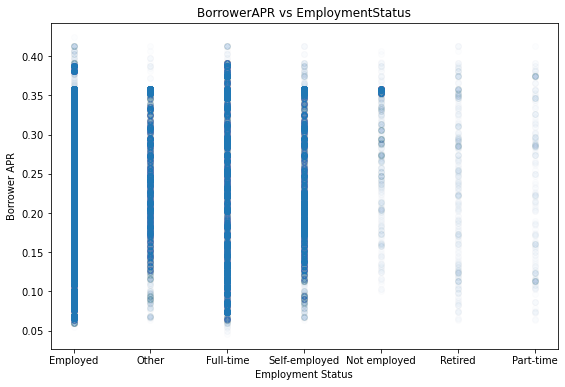

In [57]:
plot(20, 6) 
plt.subplot(1, 2, 1)
plt.scatter(data = loan_clean, x = 'EmploymentStatus', y = 'BorrowerAPR',  alpha =  0.01)
plt.title('BorrowerAPR vs EmploymentStatus')
plt.xlabel('Employment Status')
plt.ylabel('Borrower APR');

#### Observation 5
>* I cannot see any linear relationship between borrowers APR and Employment Status
>* Employed people have lower inter-quartile range (IQR) than not employed
>* The not employed borrowers have the highest mean borrower APR
### Q6: Any relationship between the Original Loan amount and the monthly payment plan chosen by borrowers?
#### Visualization 6

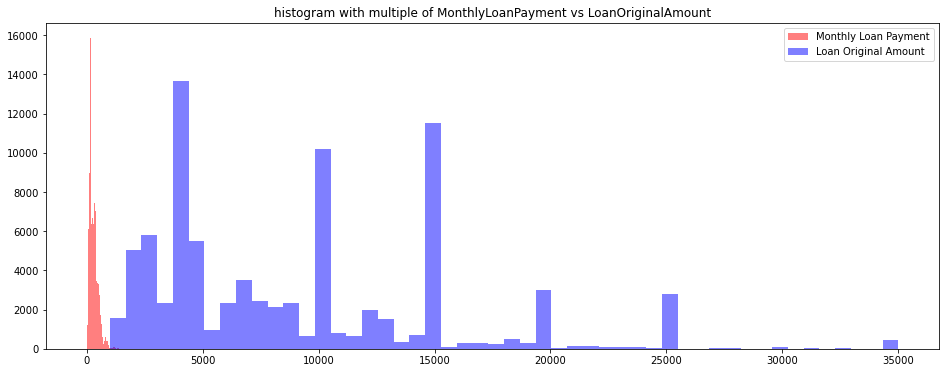

In [58]:
plot(16, 6)
plt.hist(loan_clean['MonthlyLoanPayment'], bins=50, alpha=0.5, color='red')
plt.hist(loan_clean['LoanOriginalAmount'], bins=50, alpha=0.5, color='blue')
  
plt.title("histogram with multiple of MonthlyLoanPayment vs LoanOriginalAmount")
  
plt.legend(['Monthly Loan Payment', 'Loan Original Amount'])
  
plt.show()

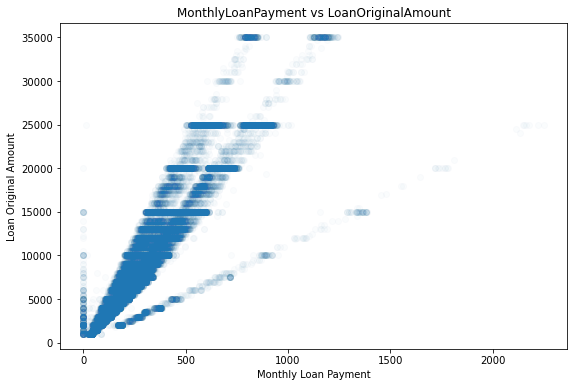

In [59]:
#Create scatterplot for further visualization
plot(20, 6)
plt.subplot(1, 2, 1)
plt.scatter(data = loan_clean, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount',  alpha =  0.02)
plt.title('MonthlyLoanPayment vs LoanOriginalAmount')
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Loan Original Amount');

#### Observation 6
>* From the scatterplot, we can see that there is a positive correlation between Loan amount and Monthly payment plan. This suggests that borrowers with larger loan amounts have longer monthly payment plan. It is safe to assume that this is to make repayment of loan easier and convenient
### Q7: What is the relationship between ListingCategory and LoanOriginalAmount?
#### Visualization 7

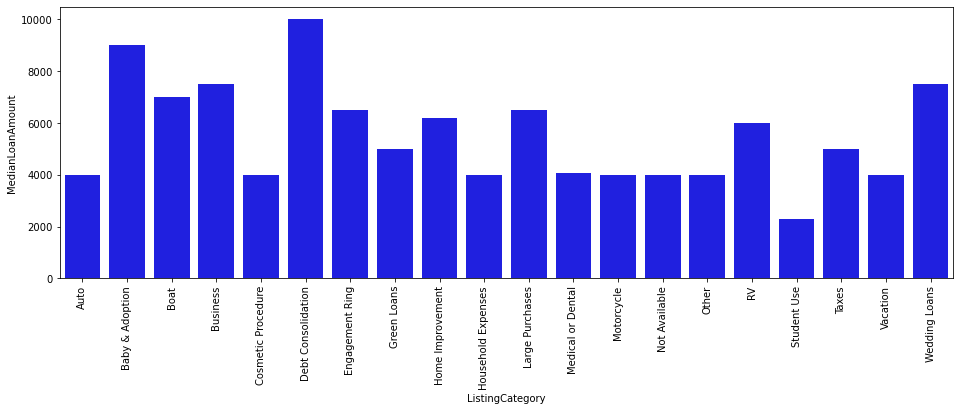

In [60]:
# obtain the median loan amount by listing category
table = loan_clean.groupby('ListingCategory')['LoanOriginalAmount'].median()
table = table.reset_index(name='MedianLoanAmount')

# Create barplot for further visualization
plot(16, 5)
sns.barplot(data=table, x='ListingCategory', y='MedianLoanAmount', ci=None, color='blue')
plt.xticks(rotation= 90);

#### Observations 7
>* From the plot, we can see that the largest loans were taken for Debt consolidation, and the least loan amount were for student use.
>* I am a bit surprised that more people collected loans for boats than for home improvement. It is an unexpected but interesting insight.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
>* There is direct proportionality (negative correlation) between BorrowerAPR and Loan Original Amount.
>*  There is an inverse relationship (positive correlation) between BorrowerRate and BorrowerAPR
>* Although I cannot see a linear relationship between EmploymentStatus and Borrower APR, I see some association between them.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>* We can see some positive relationship between Loan Monthly payment and Loan amount.

## Multivariate Exploration

### Q1: What is the nature of the combined interaction between BorrowerAPR, LoanOriginalAmount, and IncomeRange?
#### Visualization 1

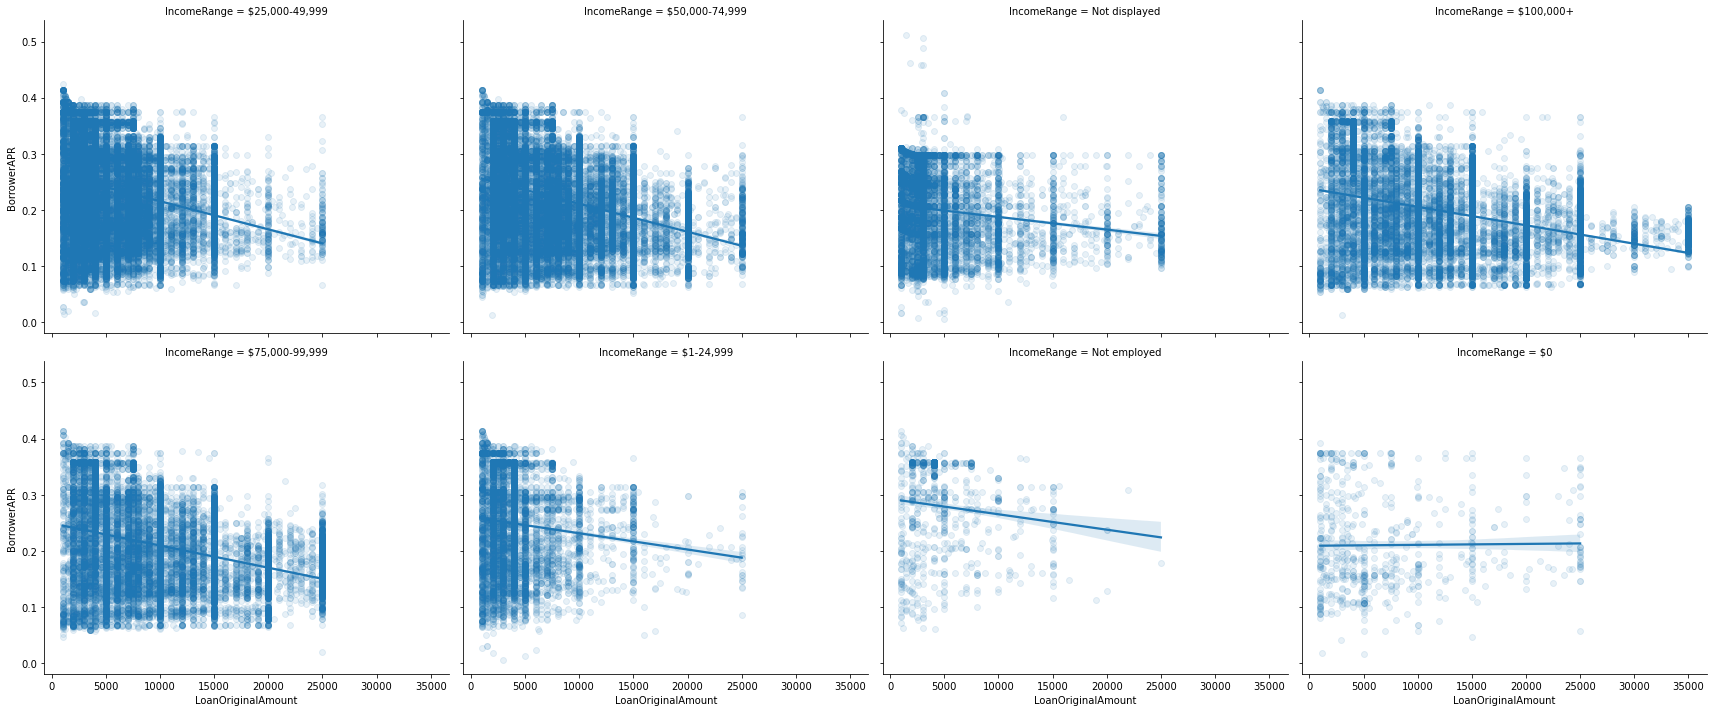

In [61]:
g=sb.FacetGrid(data=loan, aspect=1.2, height=5, col='IncomeRange', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

#### Observation 1
>* From the spread in blue heat regions, we can see that high-income earners enjoy larger loans at lower APRs than low-income earners.

>* The slope of the regression line appears less steep as income increases and vice-versa. This may indicate that the impact of income on the borrower's APR gradually diminishes as income continues to rise.
### Q2: What is the interaction between Loan status, employment status, and borrowers APR?
#### Visualization 2

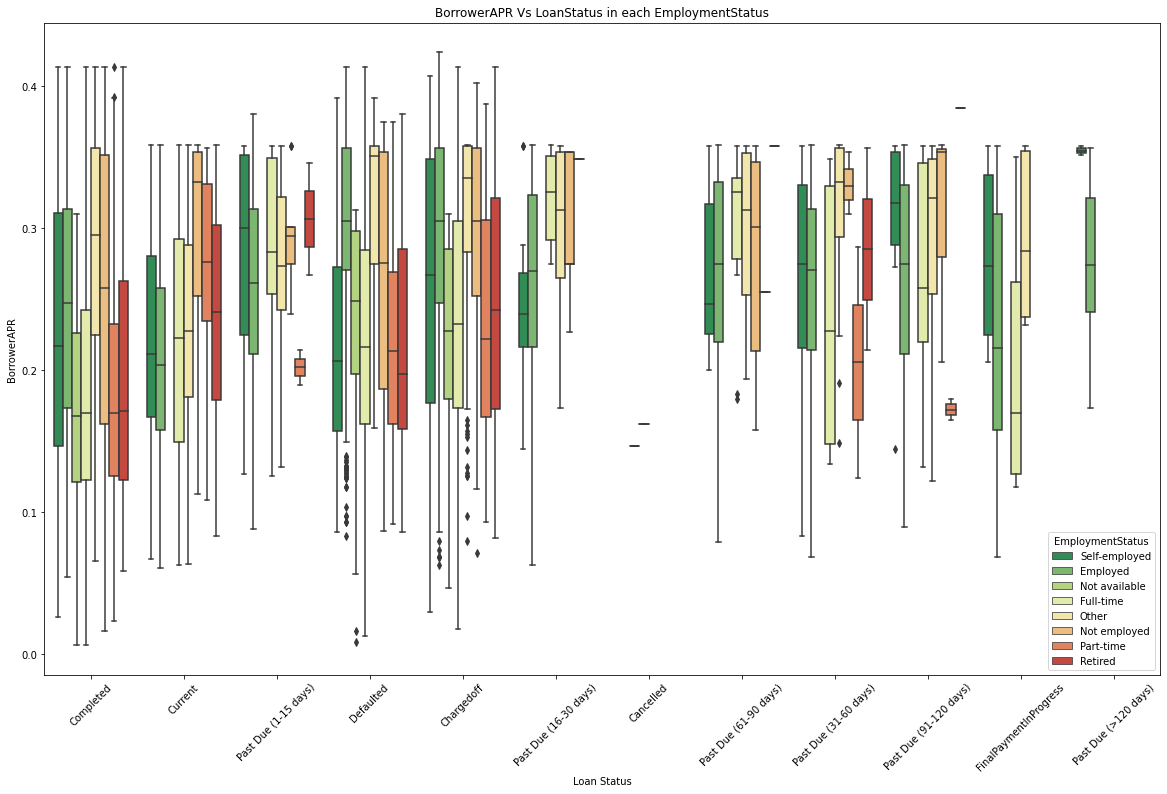

In [62]:
# LoanStatus Vs BorrowerAPR in each EmploymentStatus
plot(20,12)
sb.boxplot(x="LoanStatus", y="BorrowerAPR", hue="EmploymentStatus", data=loan, palette="RdYlGn_r");
plt.title('BorrowerAPR Vs LoanStatus in each EmploymentStatus');
plt.xlabel('Loan Status');
plt.ylabel('BorrowerAPR');
plt.xticks(rotation = 45);

#### Observation 2
>* the lowest APR is for Employed and Full-time have the lowest APR despite the category of loan status, while the non-employed have the highest APR.

>* There is a presence of outliers in the defaulted and charged-off loan status

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>* We see that people in the employed and full-time categories have the highest and lowest borrower rates regardless of their loan status category.
>* High-income earners enjoy larger loans at lower APRs than low-income earners. From this, it is safe to assume that income range of the borrowers is most likely a condition that determine loan eligibility.

### Were there any interesting or surprising interactions between features?

>* I was a  bit surprised that self-employed do not have the same relationship that employed and full-time have with borrowerAPR and loan status. I felt that just like employed and full-time, self-employed should have a high borrower rate across all loan status categories. However, just as we can see in the visualization, it is not the case.

## Conclusions
> This dataset exploration aimed at understanding the different motivations of borrowers when applying for loans. I also wanted to know the conditions that favor loan eligibility. I was quite surprised by the results of the borrowers' motivation. It turned out that the leading motivation was debt consolidation - borrowers took loans to settle another debt, thus incurring debt in the process. It turns out that the leading reasons the borrowers in this dataset requested loans were Baby & Adoption, boat (acquisition, cruise, or maintenance -it is not exactly clear), business, debt consolidation, wedding, engagement ring, and large purchases). Student use was the least listed category. From other relationships and interactions (Employment Status, Borrowers' APR) analyzed in this dataset exploration, we can assume that the company is either hesitant to give out loans to students, or students are not comfortable requesting academic loans from this company.

> There is a negative correlation between Borrower APR, loan original amount, loan term, and prosper rating. This means that the larger the loan, the longer the loan terms. This will most likely encourage borrowers to request more loans.

> From the interaction between the interaction between Loan status, employment status, income range, and borrowers' APR, we can see that employed people, full-time workers, and higher-income earners have higher loan eligibility and lower borrower APR
